In [119]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
from cv19gm.cv19sim import CV19SIM
import cv19gm.utils.cv19functions as cv19functions

# Simulation

In [ ]:
dictToSend = {'t_init':490,'t_end':550,'function':{
            "function": "events",
            "values": [
              0.3,
              {
                "function": "transition",
                "ftype": 0,
                "initvalue": 0.3,
                "endvalue": 1,
                "concavity": 0,
                "t_init":500,
                "t_end":510
              }
            ],
            "days": [
              [
                0,
                500
              ],
              [
                500,
                540
              ]
            ],
            "default": 0.3
          }}

## Function builder

In [5]:
dictToSend = {'t_init':490,'t_end':550,'function':{
            "function": "events",
            "values": [
              0.3,
              {
                "function": "transition",
                "ftype": 0,
                "initvalue": 0.3,
                "endvalue": 1,
                "concavity": 0,
                "t_init":500,
                "t_end":510
              }
            ],
            "days": [
              [
                0,
                500
              ],
              [
                500,
                540
              ]
            ],
            "default": 0.3
          }}

In [6]:
res = requests.post('http://localhost:5003/function', json=dictToSend)
print('response from server:',res.text)
dictFromServer = res.json()

response from server: {
  "results": {
    "function": [
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0.3, 
      0

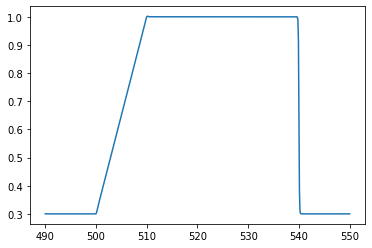

In [30]:
plt.plot(dictFromServer['results']['t'],dictFromServer['results']['function'])

In [19]:
np.linspace(0,10,101)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

## Data Fit

In [2]:
beta_values = [0.2,0.3,0.15,0.4]
beta_days = [50,65,80]
mu = 2.5

In [4]:
cfg = 'SEIR.toml'
beta = cv19functions.piecewise(values = beta_values,limits=beta_days)

sims = CV19SIM(config=cfg,beta=beta,mu=mu,t_end=200)
sims.solve()

sim = sims.sims[0]
I_d_data = sim.I_d
t_data = sim.t

In [102]:
sim.results[['I_d','t']].to_json()

'{"I_d":{"0":3000,"1":2885,"2":2704,"3":2562,"4":2478,"5":2448,"6":2462,"7":2510,"8":2583,"9":2677,"10":2786,"11":2909,"12":3042,"13":3186,"14":3338,"15":3498,"16":3665,"17":3839,"18":4020,"19":4208,"20":4402,"21":4603,"22":4809,"23":5022,"24":5240,"25":5463,"26":5691,"27":5924,"28":6161,"29":6401,"30":6644,"31":6890,"32":7138,"33":7387,"34":7636,"35":7886,"36":8134,"37":8380,"38":8623,"39":8862,"40":9097,"41":9325,"42":9547,"43":9760,"44":9964,"45":10158,"46":10341,"47":10511,"48":10668,"49":10810,"50":10941,"51":11450,"52":12274,"53":13107,"54":13864,"55":14524,"56":15094,"57":15580,"58":15989,"59":16326,"60":16594,"61":16794,"62":16927,"63":16995,"64":16998,"65":16930,"66":16263,"67":15111,"68":13918,"69":12823,"70":11851,"71":10993,"72":10234,"73":9555,"74":8944,"75":8389,"76":7882,"77":7414,"78":6980,"79":6576,"80":6203,"81":6305,"82":6776,"83":7233,"84":7572,"85":7788,"86":7895,"87":7914,"88":7865,"89":7765,"90":7623,"91":7450,"92":7252,"93":7039,"94":6813,"95":6579,"96":6339,"97

In [27]:
list(I_d_data.astype(int))[0]

3000

In [66]:
dictToSend = {'tE_I':5,'tI_R':10,'I_d_data':sim.results['I_d'].to_json(),'t_data':sim.results['t'].to_json()}

In [103]:
print(dictToSend)

{'tE_I': 5, 'tI_R': 10, 'I_d_data': '{"0":3000,"1":2885,"2":2704,"3":2562,"4":2478,"5":2448,"6":2462,"7":2510,"8":2583,"9":2677,"10":2786,"11":2909,"12":3042,"13":3186,"14":3338,"15":3498,"16":3665,"17":3839,"18":4020,"19":4208,"20":4402,"21":4603,"22":4809,"23":5022,"24":5240,"25":5463,"26":5691,"27":5924,"28":6161,"29":6401,"30":6644,"31":6890,"32":7138,"33":7387,"34":7636,"35":7886,"36":8134,"37":8380,"38":8623,"39":8862,"40":9097,"41":9325,"42":9547,"43":9760,"44":9964,"45":10158,"46":10341,"47":10511,"48":10668,"49":10810,"50":10941,"51":11450,"52":12274,"53":13107,"54":13864,"55":14524,"56":15094,"57":15580,"58":15989,"59":16326,"60":16594,"61":16794,"62":16927,"63":16995,"64":16998,"65":16930,"66":16263,"67":15111,"68":13918,"69":12823,"70":11851,"71":10993,"72":10234,"73":9555,"74":8944,"75":8389,"76":7882,"77":7414,"78":6980,"79":6576,"80":6203,"81":6305,"82":6776,"83":7233,"84":7572,"85":7788,"86":7895,"87":7914,"88":7865,"89":7765,"90":7623,"91":7450,"92":7252,"93":7039,"94"

In [104]:
res = requests.post('http://192.168.2.131:5003/datafit', json=dictToSend)
print('response from server:',res.text)
dictFromServer = res.json()

response from server: {
  "results": {
    "beta_days": "[50, 65, 80]", 
    "beta_values": "[0.2, 0.3, 0.1499, 0.4001]", 
    "mu": 2.4991, 
    "simulation": "{\"t\":{\"0\":0,\"1\":1,\"2\":2,\"3\":3,\"4\":4,\"5\":5,\"6\":6,\"7\":7,\"8\":8,\"9\":9,\"10\":10,\"11\":11,\"12\":12,\"13\":13,\"14\":14,\"15\":15,\"16\":16,\"17\":17,\"18\":18,\"19\":19,\"20\":20,\"21\":21,\"22\":22,\"23\":23,\"24\":24,\"25\":25,\"26\":26,\"27\":27,\"28\":28,\"29\":29,\"30\":30,\"31\":31,\"32\":32,\"33\":33,\"34\":34,\"35\":35,\"36\":36,\"37\":37,\"38\":38,\"39\":39,\"40\":40,\"41\":41,\"42\":42,\"43\":43,\"44\":44,\"45\":45,\"46\":46,\"47\":47,\"48\":48,\"49\":49,\"50\":50,\"51\":51,\"52\":52,\"53\":53,\"54\":54,\"55\":55,\"56\":56,\"57\":57,\"58\":58,\"59\":59,\"60\":60,\"61\":61,\"62\":62,\"63\":63,\"64\":64,\"65\":65,\"66\":66,\"67\":67,\"68\":68,\"69\":69,\"70\":70,\"71\":71,\"72\":72,\"73\":73,\"74\":74,\"75\":75,\"76\":76,\"77\":77,\"78\":78,\"79\":79,\"80\":80,\"81\":81,\"82\":82,\"83\":83,\"84\":84,\

In [118]:
json.loads(json.loads(res.text)['results']['simulation']).keys()

dict_keys(['t', 'dates', 'S', 'E', 'E_d', 'I', 'I_d', 'R', 'R_d', 'Flux', 'E_ac', 'I_ac', 'R_ac', 'I_det', 'I_d_det', 'I_ac_det', 'prevalence_total', 'prevalence_susc', 'prevalence_det'])

In [92]:
from flask import jsonify